# Hypothesis Test for Comparing Machine Learning Algorithms


[blog link]( https://machinelearningmastery.com/hypothesis-test-for-comparing-machine-learning-algorithms/ )


## Abstract

Machine learning models are chosen based on their mean performance, often calculated using k-fold cross-validation.

The solution is to use a statistical hypothesis test to evaluate whether the difference in the mean performance between any two algorithms is real or not.

## Introduction

## Methods

## Results

## Discussion

## Conclusion



<br>
<br>

# Imports

In [20]:
import os

import data_science_tools as tools
from matplotlib.pylab import plt
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (
    cross_val_score,
    RepeatedStratifiedKFold,
)
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from mlxtend.evaluate import paired_ttest_5x2cv

import src

In [2]:
%matplotlib inline
tools.config.initialize()

<br>
<br>

# Processed Data

In [7]:
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=10,
    n_redundant=0,
    random_state=1,
)
print(X.shape, y.shape)

(1000, 10) (1000,)


<br>
<br>

# Model

In [22]:
models = tools.DotDict({
    'logistic_regression': LogisticRegression(),
    'linear_discrimant_analysis': LinearDiscriminantAnalysis(),
})

<br>
<br>

# Training: Cross-Validation

In [15]:
def train_model(X, y, model, **kws):
    cross_validation = RepeatedStratifiedKFold(
        n_splits=10,
        n_repeats=3,
        random_state=1,
    )
    scores = cross_val_score(
        model, X, y,
        scoring='accuracy',
        cv=cross_validation,
        n_jobs=-1,
    )
    print(f'{model.__class__.__name__}. Mean accuracy: {np.mean(scores):.3f} ({np.std(scores):.3f})')
    return scores

In [33]:
scores = tools.DotDict()
for model_name, model in models.items():
    print(f'training {model_name}')
    scores[model_name] = train_model(X, y, model)
    

training logistic_regression
LogisticRegression. Mean accuracy: 0.892 (0.036)
training linear_discrimant_analysis
LinearDiscriminantAnalysis. Mean accuracy: 0.893 (0.033)


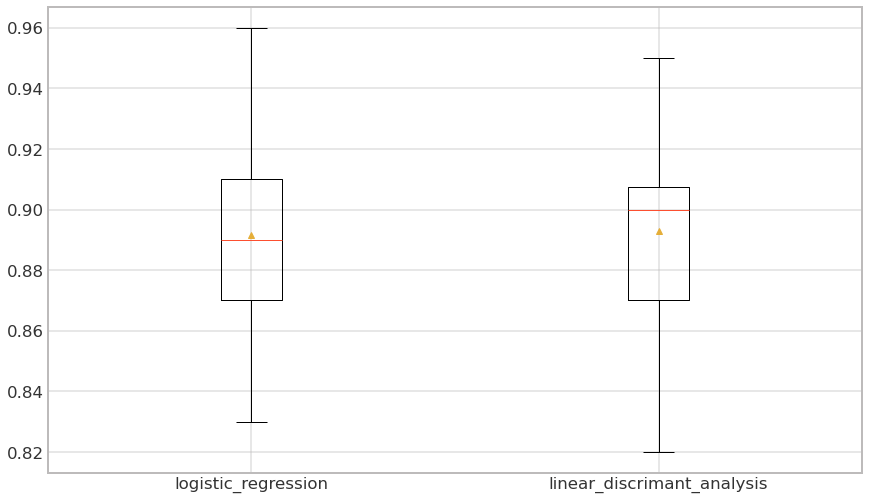

In [28]:
plt.boxplot(scores.values(), labels=scores.keys(), showmeans=True)
plt.show()

In [29]:
t, p = paired_ttest_5x2cv(
    estimator1=models.logistic_regression,
    estimator2=models.linear_discrimant_analysis,
    X=X,
    y=y,
    scoring='accuracy',
    random_seed=1,
)

In [30]:
print('P-value: %.3f, t-Statistic: %.3f' % (p, t))
if p <= 0.05:
    print('Difference between mean performance is probably real')
else:
    print('Algorithms probably have the same performance')

P-value: 0.328, t-Statistic: 1.085
Algorithms probably have the same performance
